#The Basics: Training your first Neural Network



*   We will use tensorflow
*   Keras is integrated into tf
*   Train with the given data
*   Improve the model with added data





In [13]:
import tensorflow as tf #makes it much easier to write the code as we do not need to put all the codes by using the tensorflow

In [14]:
tf.__version__   # to know the version of the tensorflow

'2.9.2'

#importing libraries

In [15]:
import numpy as np #it helps us to represent our data as highly performent list
import logging  #Logging is a way to store information about your script and track events that occur
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

#Setting up the data

In [16]:
#training data is ready
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float) #input variables taking as celsius
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float) #the actual output variables as fahrenheits
for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i])) # enumarate for having a count and a value from the iteration

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


create a model

#Dense a layer that is deeply connected with its preceding layer
 #keras is used to build the machine kearning model

 #input_shape is 1 dimentional array with 1 member 
 #units=1 the number of nueron in the layes, try to define how many internal variables, the layer has try to learn to solve the problem

In [17]:
l0=tf.keras.layers.Dense(units=1, input_shape=[1])

assemble layers into the model

#Sequential basically takes the list of layers and then specifying the calculation orders

In [18]:
model=tf.keras.Sequential([l0]) #model is ready and it takes only one layer l0

Before training, the model has to be compiled. When compiled for training, the model is given

compile the model with loss and optimizer functions


1. loss f: how far off predictions are from desired output, basically calculates the gap between actual output and desired output


2. optimizer: adjusting internal values to reduce loss, basically it      directs how weights should be adjusted

here loss uses the "mean_squared_error" where the optimizer uses the function Adam and the optizer need to know the learning rate
 
 
  here the learning rate is 0.1, if the value is too small the in take too mane iterartions and if the value is high then the accuracy goes down

In [19]:
 #default value 0.001(most commonly used learning rate) 
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

#Train the model by fit method

1.fit is basically used to calculate the loss at each point and try to solve this problem


2.epochs basically suggest how many times the cycle should be run

3.verbose argument control how much output the method produces

In [20]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


#Display training stats

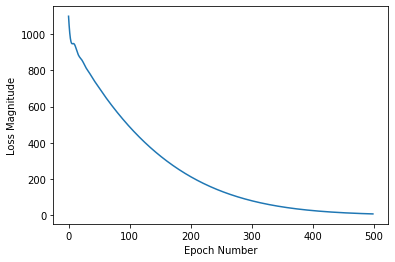

In [21]:
#plotting the model
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')

plt.ylabel("Loss Magnitude")

plt.plot(history.history['loss'])

#Now use the model to predict values

In [22]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 43ms/step
[[211.33823]]


In [23]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8201618]], dtype=float32), array([29.322054], dtype=float32)]


In [24]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])

l1 = tf.keras.layers.Dense(units=4)

l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0, l1, l2])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

print("Finished training the model")

print(model.predict([100.0]))

print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))

print("These are the l0 variables: {}".format(l0.get_weights()))

print("These are the l1 variables: {}".format(l1.get_weights()))

print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 49ms/step
[[211.74744]]
1/1 [==============================] - 0s 22ms/step
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.24197142,  0.04765558,  0.69726676,  0.31881413]],
      dtype=float32), array([-3.454754 ,  3.1618667,  3.717437 , -1.2131882], dtype=float32)]
These are the l1 variables: [array([[ 1.0476719 ,  0.92868656, -1.0913581 , -0.7251778 ],
       [-0.7178953 , -0.48241884, -0.16988352, -0.16281626],
       [-0.9964079 , -0.64993435, -0.5844459 ,  0.14758001],
       [ 0.04952291,  0.48917502,  0.5059006 ,  0.1126531 ]],
      dtype=float32), array([-3.619912 , -3.2861972, -2.0930343,  2.2224336], dtype=float32)]
These are the l2 variables: [array([[-1.2106495 ],
       [-0.9478918 ],
       [-0.1692569 ],
       [ 0.36780283]], dtype=float32), array([3.4486444], dtype=float32)]


##Improve the model with added data

In [46]:
celsius_q    = np.array([-50,-40,-15,-10, 0,  8,10,12, 15, 22, 25,30,35, 38,80,115,120,125,135,140,145,150,155,160,162,164,166,168,170],  dtype=float) #input variables taking as celsius
fahrenheit_a = np.array([-58,-40,5, 14, 32, 46,50,53, 59, 72,77,86,95, 100,176,239,248,257,275,284,293,302,311,320,324,327,331,334,338],  dtype=float) #the actual output variables as fahrenheits
for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i])) # enumarate for having a count and a value from the iteration

-50.0 degrees Celsius = -58.0 degrees Fahrenheit
-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-15.0 degrees Celsius = 5.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
10.0 degrees Celsius = 50.0 degrees Fahrenheit
12.0 degrees Celsius = 53.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
25.0 degrees Celsius = 77.0 degrees Fahrenheit
30.0 degrees Celsius = 86.0 degrees Fahrenheit
35.0 degrees Celsius = 95.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit
80.0 degrees Celsius = 176.0 degrees Fahrenheit
115.0 degrees Celsius = 239.0 degrees Fahrenheit
120.0 degrees Celsius = 248.0 degrees Fahrenheit
125.0 degrees Celsius = 257.0 degrees Fahrenheit
135.0 degrees Celsius = 275.0 degrees Fahrenheit
140.0 degrees Celsius = 284.0 degrees Fahrenheit
145.0 degrees Celsius = 293.0 degrees Fahrenh

In [47]:
l1=tf.keras.layers.Dense(units=1, input_shape=[1])

In [48]:
model=tf.keras.Sequential([l1]) #model is ready and it takes only one layer l1

In [49]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

In [56]:
history = model.fit(celsius_q, fahrenheit_a, epochs=1500, verbose=False)
print("Finished training the model")

Finished training the model


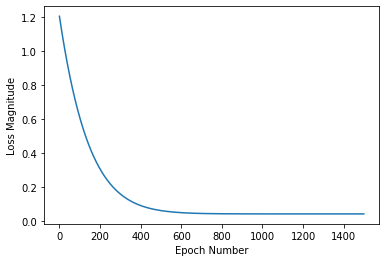

In [57]:
#plotting the model
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')

plt.ylabel("Loss Magnitude")

plt.plot(history.history['loss'])

In [58]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 26ms/step
[[211.97401]]


1.At first I am adding many more data and try to find a better result. I have seen the value went far from the 212 then increase the value of epoch from 500 to 1500 and see the effect so here the value is 211.9711(almost) 212.. 


As we know the more epoch you have the more it going into data

2.Then again increase the data a little bit and reduce the epoch to 1000
and we get a more better result as 211.97363

3. Again increasing some data points and set epoch=1000 
   (give worse result)
4. reduce epoch to 500(a slight better)
5. increase epoch to 1500 give great result from the above trials
    (211.97401)

#conclussion



1.More increase in the data the accuracy will increase.

2.with increase in the epoch value also the accuracy can increase(by trail and error with the iterations).